In [1]:
import Solar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ExpSineSquared

In [2]:
def getsolarprediction(daywanted):
    
    days = np.array([d for d in range(1, 365+1)])
    
    supplies = []
    
    for d in days:
        solarsupply = Solar.getsolarsupply(d).sum()[0]
        supplies.append(solarsupply)

    window = 30
    
    s = pd.Series(supplies, index=days)
    
    r = s.rolling(window=window, center=True).sum()/window
    
    low = int(window/2)
    
    high = len(s) - low
    
    r[:low] = r[low+1]
    
    r[high:] = r[high]
    
    return type(r)

In [3]:
days = np.array([d for d in range(1, 365+1)])
supplies = []
for d in days:
    solarsupply = Solar.getsolarsupply(d).sum()[0]
    supplies.append(solarsupply)

window = 30
s = pd.Series(supplies, index=days)
r = s.rolling(window=window, center=True).sum()/window



In [4]:
low = int(window/2)
high = len(s) - low
r[:low] = r[low+1]
r[high:] = r[high]
r[1]

1289.6533333333339

GPML kernel: WhiteKernel(noise_level=1e+05) + RBF(length_scale=1e-05) * ExpSineSquared(length_scale=1.3, periodicity=1)
Log-marginal-likelihood: -18905.911


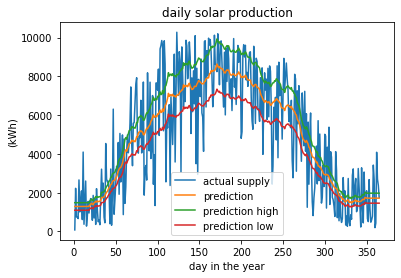

In [5]:

kernel = WhiteKernel() + RBF(length_scale=90.0) * ExpSineSquared(length_scale=1.3, periodicity=1.0)

gpr = GaussianProcessRegressor(kernel, alpha=10^4, normalize_y=True)
gpr.fit(days.reshape(-1,1), supplies)
s_pred = gpr.predict(days.reshape(-1,1))
print("GPML kernel: %s" % gpr.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gpr.log_marginal_likelihood(gpr.kernel_.theta))

fig, ax = plt.subplots()
ax.plot(days, supplies, label='actual supply')
ax.plot(days, r, label='prediction')
ax.plot(days, r*1.15, label='prediction high')
ax.plot(days, r*0.85, label='prediction low')
ax.set_xlabel('day in the year')
ax.set_ylabel('(kWh)')
ax.set_title('daily solar production')
ax.legend()

In [6]:
# getsolarprediction(1)

In [7]:
# s = pd.Series({r})
# pd.Series({r}).to_csv('/Users/oliver/Documents/My Documents/Oxford/3YP/My Model/SMART model/Data/solarprediction.csv')

In [8]:
r = pd.DataFrame(r)

In [9]:
# r.to_csv('Data/solarprediction.csv')

In [10]:
r

,0
1,1289.653333
2,1289.653333
3,1289.653333
4,1289.653333
5,1289.653333
...,...
361,1717.173333
362,1717.173333
363,1717.173333
364,1717.173333
